In [1]:
'''
This notebook implements a batch run for OFAT analysis
Packages
'''
from model import *
import csv
from mesa.batchrunner import BatchRunner
import pandas as pd
import numpy as np
import tqdm as tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import time
from SALib.sample import saltelli
from SALib.analyze import sobol
from itertools import combinations
from joblib import Parallel, delayed, cpu_count

In [2]:
def collect_samples(samples, columns, parameter, values):
    df_experiment = pd.DataFrame(columns=columns)
    parameter_name = parameter
    kwargs = {f'{parameter}':values}
    for k in range(int(samples)):
        '''
        Repeat trial with certain parameter k times to apply clt
        '''            
        model = HousingMarket(**kwargs)
        model.run_model(max_steps)
        data = model.datacollector.get_model_vars_dataframe()
        dic = {'Variable': parameter_name, 'Parameter': values, 'Gini': data['Gini'].iloc[-1]}
        df_experiment = pd.concat([df_experiment, pd.DataFrame(pd.Series(dic)).T])
    return df_experiment

def run_batch_parallel(problem, i, ofat_size, samples, columns):
    parameter = problem['names'][i]
    variable_values = np.linspace(*problem['bounds'][i], ofat_size)
    results = Parallel(n_jobs= cpu_count())(delayed(collect_samples)(samples, columns, parameter, value)
                       for value in variable_values)
    final = pd.concat(results)
    return final

def run_batch_parallel_plotter(result, i):
    '''
    This plots the result from running a batch runner in parallel
    '''
    
    fig = plt.plot( figsize = (20,40))
    y = []
    err = []
    x = np.linspace(*problem['bounds'][i], ofat_size)

    for j in range(len(x)):
        series = result['Gini'][int(j*samples):int((j+1)*samples)]
        y.append(series.mean())
        err.append(1.96 * (series.std()/np.sqrt(samples)))

    plt.plot(x, y , c='k')
    plt.fill_between(x, np.array(y) - np.array(err), np.array(y) + np.array(err)) 
    plt.ylabel("Gini")
    plt.xlabel(problem['names'][i])
    plt.show()

In [3]:
'''
This defines the bounds of for the ofat analysis
'''
problem = {
    'names': ['savings_lower', 'savings_upper', 'price_lower', 'price_upper', 
              'payoff_perc_freehold', 'inflation', 'chi_parameter', 'bank_income_multiplier', 
             'alpha_mean', 'beta_mean', 'lmbda_mean'],
    'bounds': [[1, 40_000], [1, 100_000], [10_000, 90_000], [11_000, 100_000],
              [0.001,0.1],[0.01,0.03],[5,7.5],[0,20],
              [0.01, 2.5], [0.01, 2.5], [0.01, 2.5]]    
}

columns = ('Variable', 'Parameter', 'Gini')

'''
This defines model run
'''
samples = 30
max_steps = 10_000
ofat_size = 12

Experiment started at: Wed Feb  9 19:59:22 2022


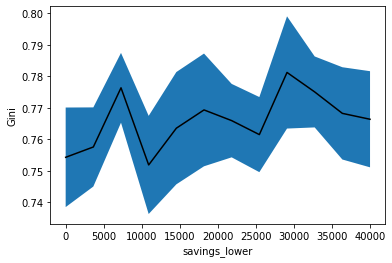

Experiment ended at: Wed Feb  9 20:59:35 2022. Time duration: 3613.320269346237


In [4]:
'''
Savings Lower
'''
print(f"Experiment started at: {time.ctime()}")
begintime= time.time()

sa_savingslower = run_batch_parallel(problem, 0, ofat_size, samples, columns)
run_batch_parallel_plotter(sa_savingslower, 0)
sa_savingslower.to_csv('C:/Users/sebas/Documents/GitHub/ABM/outputs/sa_savingslower.csv')

print(f"Experiment ended at: {time.ctime()}. Time duration: {time.time() - begintime}")

Experiment started at: Wed Feb  9 21:00:52 2022


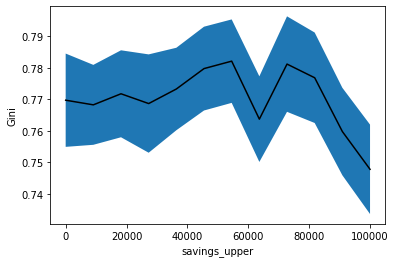

Experiment ended at: Wed Feb  9 21:58:24 2022. Time duration: 3452.3837027549744


In [5]:
'''
Savings upper
'''
print(f"Experiment started at: {time.ctime()}")
begintime= time.time()

sa_savingsupper = run_batch_parallel(problem, 1, ofat_size, samples, columns)
run_batch_parallel_plotter(sa_savingsupper, 1)
sa_savingsupper.to_csv('outputs/sa_savingsupper.csv')

print(f"Experiment ended at: {time.ctime()}. Time duration: {time.time() - begintime}")

Experiment started at: Wed Feb  9 22:04:16 2022


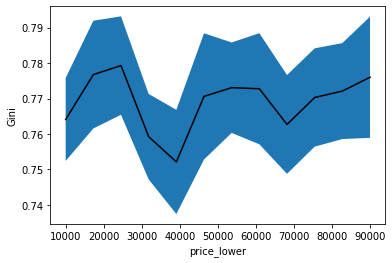

Experiment ended at: Wed Feb  9 23:02:32 2022. Time duration: 3495.5171144008636


In [6]:
'''
Price lower
'''
print(f"Experiment started at: {time.ctime()}")
begintime= time.time()

sa_pricelower = run_batch_parallel(problem, 2, ofat_size, samples, columns)
run_batch_parallel_plotter(sa_pricelower, 2)
sa_pricelower.to_csv('outputs/sa_pricelower.csv')

print(f"Experiment ended at: {time.ctime()}. Time duration: {time.time() - begintime}")

In [ ]:
'''
Price upper
'''
print(f"Experiment started at: {time.ctime()}")
begintime= time.time()

sa_priceupper = run_batch_parallel(problem, 3, ofat_size, samples, columns)
run_batch_parallel_plotter(sa_priceupper, 3)
sa_priceupper.to_csv('outputs/sa_priceupper.csv')

print(f"Experiment ended at: {time.ctime()}. Time duration: {time.time() - begintime}")

In [ ]:
'''
payoff_perc_freehold
'''
print(f"Experiment started at: {time.ctime()}")
begintime= time.time()

sa_payoff = run_batch_parallel(problem, 4, ofat_size, samples, columns)
run_batch_parallel_plotter(sa_payoff, 4)
sa_payoff.to_csv('outputs/sa_payoff.csv')

print(f"Experiment ended at: {time.ctime()}. Time duration: {time.time() - begintime}")

In [ ]:
'''
Inflation
'''
print(f"Experiment started at: {time.ctime()}")
begintime= time.time()

sa_inflation = run_batch_parallel(problem, 5, ofat_size, samples, columns)
run_batch_parallel_plotter(sa_inflation, 5)
sa_inflation.to_csv('outputs/sa_inflation.csv')

print(f"Experiment ended at: {time.ctime()}. Time duration: {time.time() - begintime}")

In [ ]:
'''
Chi parameter
'''
print(f"Experiment started at: {time.ctime()}")
begintime= time.time()

sa_chi = run_batch_parallel(problem, 6, ofat_size, samples, columns)
run_batch_parallel_plotter(sa_chi, 6)
sa_chi.to_csv('outputs/sa_chi.csv')

print(f"Experiment ended at: {time.ctime()}. Time duration: {time.time() - begintime}")

In [ ]:
'''
Bank income multiplier
'''
print(f"Experiment started at: {time.ctime()}")
begintime= time.time()

sa_bankincome = run_batch_parallel(problem, 7, ofat_size, samples, columns)
run_batch_parallel_plotter(sa_bankincome, 7)
sa_bankincome.to_csv('outputs/sa_bankincome')

print(f"Experiment ended at: {time.ctime()}. Time duration: {time.time() - begintime}")